In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [4]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


## Data Cleaning

In [5]:
data.columns=["month","sales"]
data.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
data[["sales"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   105 non-null    float64
dtypes: float64(1)
memory usage: 984.0 bytes


In [7]:
data[["month"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   106 non-null    object
dtypes: object(1)
memory usage: 984.0+ bytes


In [8]:
data.tail()

,month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
data.drop([105,106], axis=0, inplace=True)

In [10]:
data.tail()

,month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
data.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
data["month"]=pd.to_datetime(data["month"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   105 non-null    datetime64[ns]
 1   sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [14]:
data.set_index("month", inplace=True)

In [15]:
data.head()

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


## Checking for stationary

In [16]:
## two processes are there 
#1. Rolling Mean
#2. Dicky_fuller test

<AxesSubplot:xlabel='month'>

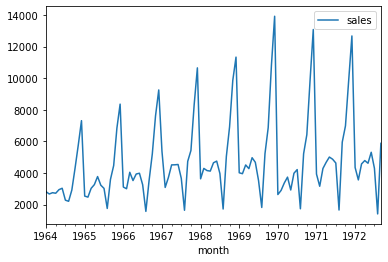

In [17]:
data.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
test_result= adfuller(data)

In [20]:
def func(test_result):
    sta_values= ['ADF_Statistics', 'P_Value','Lags','Number of observation used', 'Critical Values']
    for s, z in zip(sta_values,test_result):
        print(" {0} : {1}".format(s,z))

In [21]:
func(test_result)

 ADF_Statistics : -1.8335930563276197
 P_Value : 0.3639157716602465
 Lags : 11
 Number of observation used : 93
 Critical Values : {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}


## Making the series stationary(differencing)

In [22]:
data["First Seasonal Data"]= data["sales"]- data["sales"].shift(12)

In [23]:
data.head(20)

,sales,First Seasonal Data
month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [24]:
test_result2= adfuller(data["First Seasonal Data"].dropna())

In [25]:
func(test_result2)

 ADF_Statistics : -7.626619157213166
 P_Value : 2.0605796968136632e-11
 Lags : 0
 Number of observation used : 92
 Critical Values : {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}


<AxesSubplot:xlabel='month'>

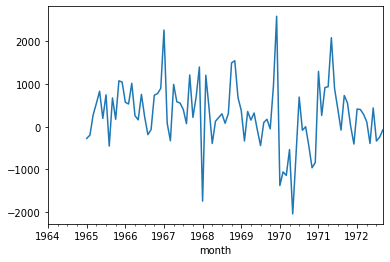

In [26]:
data["First Seasonal Data"].plot()

## Finding p,d,q value

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

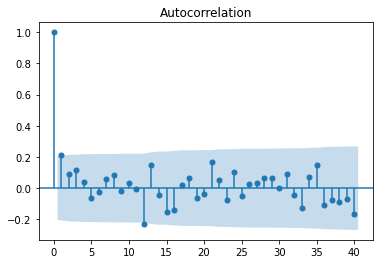

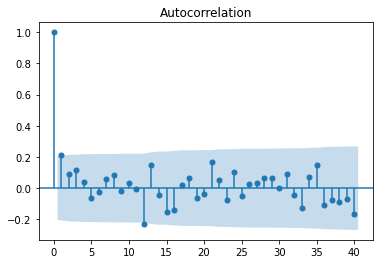

In [28]:
plot_acf(data["First Seasonal Data"].iloc[13:], lags=40)

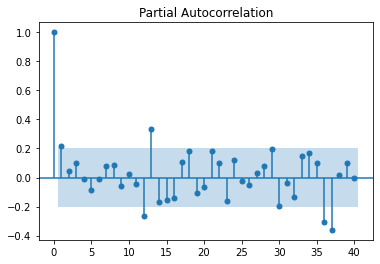

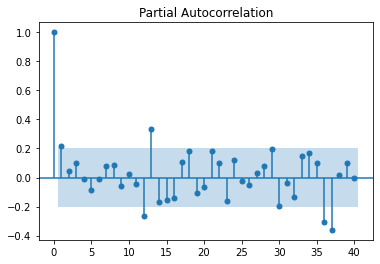

In [29]:
plot_pacf(data["First Seasonal Data"].iloc[13:], lags=40)

In [30]:
## p=1, q=1(seasonal=12-- First Difference),d=1

## Model Creation

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model=SARIMAX(data["sales"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\kpmuk\anaconda3\envs\anomaly\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kpmuk\anaconda3\envs\anomaly\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='month'>

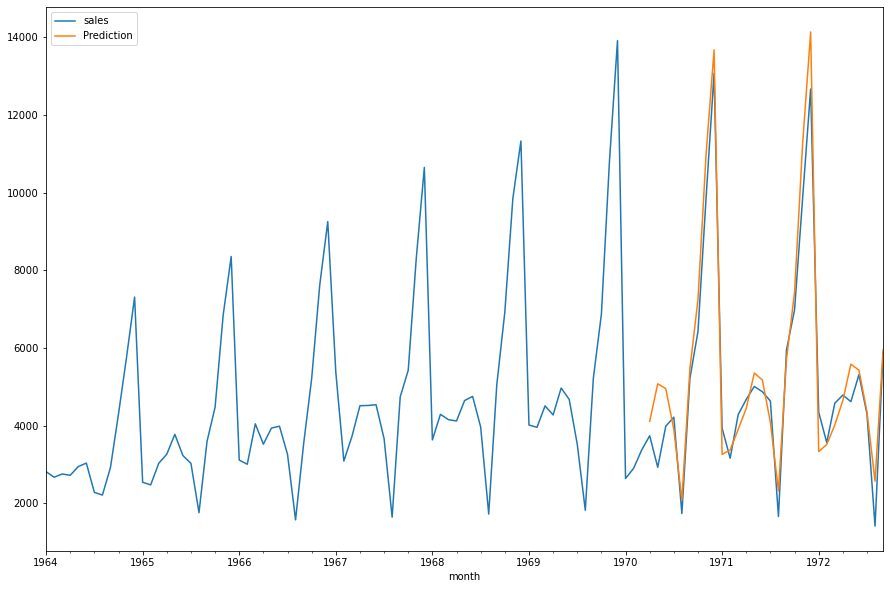

In [33]:
data['Prediction']=results.predict(start=75,end=105,dynamic=True)
data[['sales','Prediction']].plot(figsize=(15,10))

## Prediction

In [34]:
y=pd.to_datetime("1979-01-01")

In [35]:
results.predict(y)

1979-01-01    5652.438192
Freq: MS, dtype: float64